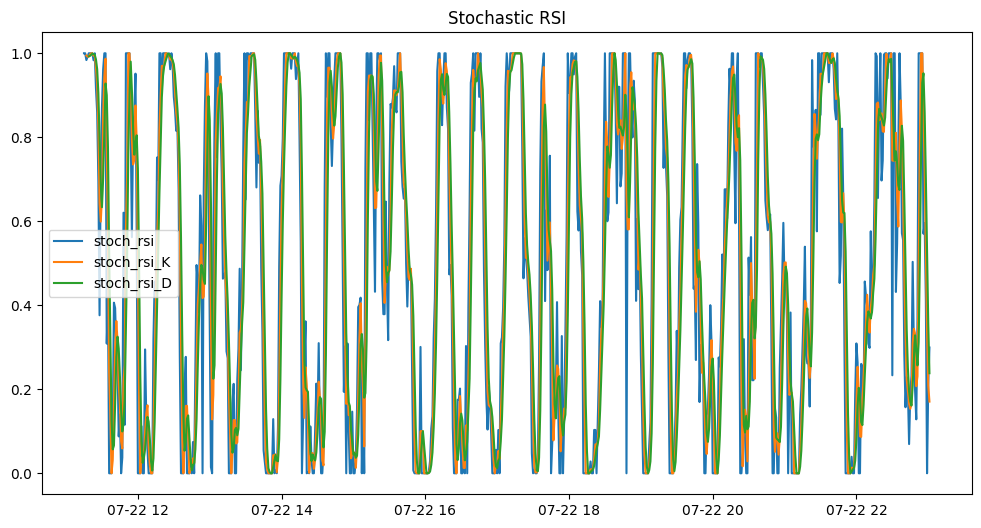

(array([ 76,  80,  84,  86, 147, 149, 153, 182, 188, 192, 215, 217, 225,
       276, 309, 314, 338, 341, 344, 366, 373, 417, 420, 424, 448, 454,
       464, 490, 495, 514, 518, 554, 559, 575, 578, 626, 631, 637, 642,
       674, 678, 682, 686]), {'prominences': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'left_bases': array([ 70,  70,  70,  70, 140, 140, 140, 174, 174, 174, 212, 212, 212,
       247, 300, 300, 333, 333, 333, 360, 360, 413, 413, 413, 441, 441,
       441, 484, 484, 505, 505, 542, 542, 567, 567, 610, 610, 610, 610,
       661, 661, 661, 661]), 'right_bases': array([ 94,  94,  94,  94, 165, 165, 165, 195, 195, 195, 232, 232, 232,
       289, 322, 322, 354, 354, 354, 388, 388, 430, 430, 430, 466, 466,
       466, 502, 502, 531, 531, 561, 561, 588, 588, 649, 649, 649, 649,
       717, 717, 717, 717]), 'widths': array([19.2757

In [4]:
# test against ohlc data from 'https://api.kraken.com/0/public/OHLC?pair={asset}&interval=1
# to get the stochastic rsi and plot it against the ohlc data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
from datetime import datetime
from scipy.signal import argrelextrema
from scipy.signal import find_peaks

def get_ohlc_data(asset):
    url = f'https://api.kraken.com/0/public/OHLC?pair={asset}&interval=1'
    response = requests.get(url)
    ohlc_data = response.json()
    ohlc_data = ohlc_data['result'][asset]
    ohlc_data = pd.DataFrame(ohlc_data, columns=['time', 'open', 'high', 'low', 'close', 'vwap', 'volume', 'count'])
    ohlc_data['time'] = pd.to_datetime(ohlc_data['time'], unit='s')
    ohlc_data.set_index('time', inplace=True)
    # The data is in string format, convert it to float
    ohlc_data['open'] = ohlc_data['open'].astype(float)
    ohlc_data['high'] = ohlc_data['high'].astype(float)
    ohlc_data['low'] = ohlc_data['low'].astype(float)
    ohlc_data['close'] = ohlc_data['close'].astype(float)
    ohlc_data['vwap'] = ohlc_data['vwap'].astype(float)
    ohlc_data['volume'] = ohlc_data['volume'].astype(float)
    ohlc_data['count'] = ohlc_data['count'].astype(float)

    return ohlc_data

def get_stochastic_rsi(data, period=14, smoothK=3, smoothD=3):
    delta = data['close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rsi = gain / (gain + loss)
    rsi = rsi.fillna(0)
    stoch_rsi = (rsi - rsi.rolling(period).min()) / (rsi.rolling(period).max() - rsi.rolling(period).min())
    stoch_rsi_K = stoch_rsi.rolling(smoothK).mean()
    stoch_rsi_D = stoch_rsi_K.rolling(smoothD).mean()
    return stoch_rsi, stoch_rsi_K, stoch_rsi_D

def plot_stochastic_rsi(data, stoch_rsi, stoch_rsi_K, stoch_rsi_D):
    plt.figure(figsize=(12, 6))
    # plt.plot(data.index, data['close'], label='close')
    plt.plot(stoch_rsi.index, stoch_rsi, label='stoch_rsi')
    plt.plot(stoch_rsi_K.index, stoch_rsi_K, label='stoch_rsi_K')
    plt.plot(stoch_rsi_D.index, stoch_rsi_D, label='stoch_rsi_D')
    plt.title('Stochastic RSI')
    plt.legend()
    plt.show()

def get_peaks(data, window=10):
    peaks = find_peaks(data, width=window)
    return peaks

def main():
    asset = 'SOLUSD'
    ohlc_data = get_ohlc_data(asset)
    stoch_rsi, stoch_rsi_K, stoch_rsi_D = get_stochastic_rsi(ohlc_data)
    plot_stochastic_rsi(ohlc_data, stoch_rsi, stoch_rsi_K, stoch_rsi_D)
    peaks = get_peaks(stoch_rsi)
    print(peaks)


# get and plot the ohlc data and the stochastic rsi
if __name__ == '__main__':
    main()





In [5]:
# plot the peaks on the ohlc data
plt.figure(figsize=(12, 6))
plt.plot(ohlc_data.index, ohlc_data['close'], label='close')
plt.plot(ohlc_data.index[peaks[0]], ohlc_data['close'][peaks[0]], 'ro', label='peaks')
plt.title('OHLC data with peaks')
plt.legend()
plt.show()


NameError: name 'ohlc_data' is not defined

<Figure size 1200x600 with 0 Axes>